The solutions manual has some solutions. I have tried to solve as many from the rest as possible.

In [40]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la
import statistics
import scipy.stats as stats
import scipy

from math import gamma as tma
import itertools
from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import weibull_min as weibull
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import nct as nct
from scipy.stats import f as fdist
from scipy.stats import ncf as ncfdist
from scipy.stats import chisquare as chisq
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math
import sympy as sym
import random
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.cbook import boxplot_stats

import warnings
warnings.filterwarnings('ignore')

In [41]:
def dx(a,t):
    return (norm.cdf(a, loc=0, scale=1)-t)
def invert_norm(t):
    a = 10.0
    b = -10.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dx(c,t)) > tol):
        c = (a+b)/2
        if(dx(c,t) > 0):
            a = c
        else:
            b = c
    return c

In [42]:
def dxc2(a,t,dof):
    return (chi2.cdf(a, dof)-t)
def invert_chi2(t,dof):
    a = 0
    b = 100.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxc2(c,t,dof)) > tol):
        c = (a+b)/2
        if(dxc2(c,t,dof) < 0):
            a = c
        else:
            b = c
    return c

In [43]:
def dxt(a,df,t):
    return (studt.cdf(a, df, loc=0, scale=1)-t)
def invert_studt(t,df):
    a = 10.0 * int(np.sqrt(df/(df-2)))
    b = -10.0 * int(np.sqrt(df/(df-2)))
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxt(c,df,t)) > tol):
        c = (a+b)/2
        if(dxt(c,df,t) > 0):
            a = c
        else:
            b = c
    return c

#### Exercise 8.5.1. 

Let $X_1, X_2, \cdots , X_{20}$ be a random sample of size $20$ from a distribution that is $N(\theta,5)$. Let $L(\theta)$ represent the joint pdf of $X_1,X_2,\cdots,X_{20}.$ The problem is to test $H_0 :\theta=1$ against $H_1 :\theta=0.$ Thus $\Omega=\{\theta:\theta=0,1\}.$

***(a)*** Show that $L(1)/L(0) \leq k$ is equivalent to $\overline{x} \leq c.$

***(b)*** Find $c$ so that the significance level is $\alpha = 0.05.$ Compute the power of this test if $H_1$ is true.

***(c)*** If the loss function is such that $\mathcal{L}(1,1) = \mathcal{L}(0,0) = 0$ and $\mathcal{L}(1,0) = \mathcal{L}(0,1) > 0,$ find the minimax test. Evaluate the power function of this test at the points $\theta = 1$ and $\theta = 0.$

#### Solution:

***(a)*** This is exactly same as in example $8.4.3$ except that the value of variance is different. In the solution, he mentions that $\overline{x} \leq c$ is the best critical region if $\theta'' < \theta'$ which is the case here.

***(b)*** Now $\overline{X} \sim N(\theta,1/4)$ so if $z = \Phi^{-1}(0.05)$, then $c = \theta_0+z/2 = 1+z/2.$

In [44]:
za = norm.ppf(0.05,loc=0,scale=1)
c = 1+za/2
print(c,za)

0.17757318652426357 -1.6448536269514729


If $H_1$ is true, then power is $\gamma_{C}(\theta_1) \triangleq P_{\theta_1}(X \in C)$ where $C = \{ (x_1,x_2,\cdots,x_{20}): \overline{x} \triangleq \sum_{i=1}^{20} x_i/20 \leq c\}$ and $\theta_1 = 0$.

In [45]:
pwr = norm.cdf(c,loc = 0,scale = 1/2)
print(pwr)

0.638760031312335


***(c)*** On page $509$ of the text (Section $8.5.1$), they mention that $k$ (or $c$ in our case) should be chosen such that the two risk functions are equal i.e. $R(\theta_0,C) = R(\theta_1,C)$. So we need to find $c$ such that

$$
\mathcal{L}(1,0) \int_{-\infty}^c f_{\theta=1}(\overline{x}) d\overline{x} = \mathcal{L}(0,1) \int_{-\infty}^c f_{\theta=0}(\overline{x}) d\overline{x}.
$$

Now $c$ has to be found in such a way that it satisfies the equation above. We are not given the values of $\mathcal{L}(1,0)$ and $\mathcal{L}(0,1)$ so I am not sure how this can be solved. If we assume the significance level from ***(b)***, then we get the same answer as in ***(b)*** and I am not sure why we even needed this part of the question.

#### Exercise 8.5.3.

In Example $8.5.2$ let $\mu_1' =\mu_2' =0,$ $\mu_1'' =\mu_2'' =1,$ $\sigma_1^2=1,$ $\sigma_2^2=1,$ and $\rho = 1/2.$

***(a)*** Find the distribution of the linear function $aX + bY$ .

***(b)*** With $k = 1,$ compute $P(aX + bY \leq c;\mu_1' =\mu_2' =0)$ and $P(aX + bY > c;\mu_1'' =\mu_2'' =1).$

#### Solution:

***(a)***

To apply Theorem $3.5.2$ here, we put
$$
\begin{align}
\pmb{A}&\triangleq \begin{pmatrix}
a & b
\end{pmatrix} \\
\pmb{Z}&\triangleq \begin{pmatrix}
X \\ Y
\end{pmatrix} \\
\pmb{\mu}&\triangleq \begin{pmatrix}
\mu_1 \\ \mu_2
\end{pmatrix} \\
\pmb{\Sigma}&\triangleq \begin{pmatrix}
\sigma_1^2 & \rho\sigma_1\sigma_2 \\ \rho\sigma_1\sigma_2 & \sigma_2^2
\end{pmatrix}
\end{align}
$$
and $\pmb{b} = 0$ (note that matrix $\pmb{b}$ of Theorem $3.5.2$ is different from the parameter $b$ present in matrix $\pmb{A}.$) Then from Theorem $3.5.2,$ $\pmb{A}\pmb{Z} \sim N(\pmb{A}\pmb{\mu},\pmb{A}\pmb{\Sigma}\pmb{A'})$ which when expanded by multiplying the individual matrices results in the desired expression $aX+bY \sim N(a\mu_1+b\mu_2,a^2\sigma_1^2 + 2ab\rho\sigma_1\sigma_2 + b^2\sigma_2^2)$.

***(b)***

This is again one of those things in the text that i am not clear about. In equation $8.5.3$ of the text, the authors have "deduced" the form of the inequality to be $aX+bY \leq c$ but right before that equation, they have given the complete expression for the inequality where the values of $a, b,$ and $c$ can be found. In fact, the inequality $8.5.3$ in this case turns out to be $x+y \geq 1$. The inequality is reversed as $0=\mu_1' < \mu_1''=1$ and similarly $0 = \mu_2' < \mu_2''=1.$

For the first probability, $P(aX + bY \leq c;\mu_1' =\mu_2' =0)$ is same as $P(X + Y \geq 1;\mu_1' =\mu_2' =0)$ due to the discussion above. $X+Y \sim N(0,3)$ for the given parameters so that the probability is $1-\Phi(1/\sqrt{3}).$

In [46]:
print(1-norm.cdf(1/np.sqrt(3),loc=0,scale=1))

0.28185143082538655


The second probability $P(aX + bY > c;\mu_1'' =\mu_2'' =1)$ is same as $P(X + Y < 1;\mu_1'' =\mu_2'' =1).$ $X+Y \sim N(2,3)$ for the given parameters so that the probability is $\Phi(-1/\sqrt{3}).$

In [47]:
print(norm.cdf(-1/np.sqrt(3),loc=0,scale=1))

0.28185143082538655


#### Exercise 8.5.4. 

Determine Newton’s algorithm to find the solution of Equation $(8.5.2).$ If software is available, write a program that performs your algorithm and then show that the solution is $c = 76.8.$ If software is not available, solve $(8.5.2)$ by “trial and error.”


#### Solution:

The R code is given in the solutions manual. I am merely changing it to python and running it. 

As usual, the R code was converted to python through the website https://www.codeconvert.ai/r-to-python-converter

In [48]:
def newtstp(c0):
    gc0 = norm.cdf(c0 - 78) - 3 + 3 * norm.cdf(c0 - 75)
    gpc0 = norm.pdf(c0 - 78) + 3 * norm.pdf(c0 - 75)
    c = c0 - (gc0 / gpc0)
    gc = norm.cdf(c - 78) - 3 + 3 * norm.cdf(c - 75)
    return c
#     return {'c0': c0, 'gc0': gc0, 'c': c, 'gc': gc}

In [49]:
oldc = 75
cguesses = [oldc]

for i in range(20):
    newc = newtstp(oldc)
    oldc = newc
    cguesses.append(newc)

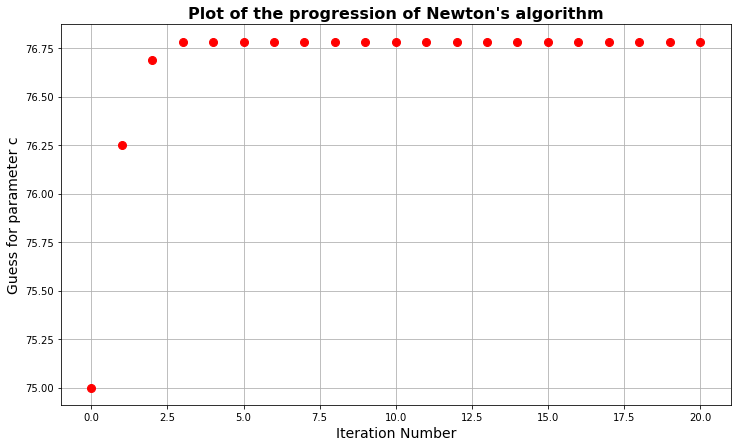

In [50]:
plt.figure(figsize = (12,7))

plt.plot(cguesses,'r.',markersize=16)
plt.ylabel('Guess for parameter c',fontsize=14)
plt.xlabel('Iteration Number',fontsize=14)
plt.grid()
plt.title('Plot of the progression of Newton\'s algorithm',fontsize=16,fontweight='bold')
plt.show()

#### Exercise 8.5.6. 

Let $X$ and $Y$ have a joint bivariate normal distribution. An observation $(x,y)$ arises from the joint distribution with parameters equal to either

$$
\mu_1' =\mu_2' = 0, ~~(\sigma_1^2)' =(\sigma_2^2)' = 1, ~~\rho' = \frac{1}{2}
$$

or

$$
\mu_1'' =\mu_2'' = 1, ~~(\sigma_1^2)''=4, ~~ (\sigma_2^2)' = 9, ~~\rho' = \frac{1}{2}.
$$

Show that the classification rule involves a second-degree polynomial in $x$ and $y$.

#### Solution:

Following the footsteps of Example $8.5.2,$ the likelihood ratio inequality

$$
\frac{f(x,y,\theta')}{f(x,y,\theta'')} \leq k
$$

basically boils down to (after taking logs)

$$
\frac{1}{2} \left [ q(x, y; \mu_1', \mu_2', \sigma_1',\sigma_2') − q(x, y; \mu_1'', \mu_2'', \sigma_1'',\sigma_2'' ) \right ] \leq \log{\left [ k\frac{\sigma_1'\sigma_2'}{\sigma_1''\sigma_2''} \right ] }
$$

and after plugging in the parameters, the inequality boils down to

$$
\frac{2}{3}\left [ \frac{5xy+x+y-1}{6} -\frac{(x+1)(3x-1)}{4} - \frac{(2y+1)(4y-1)}{9} \right ] \leq \log{\left [ \frac{k}{6} \right ]}.
$$

#### Exercise 8.5.7. 

Let $\pmb{W'} = (W1 , W2 )$ be an observation from one of two bivariate normal distributions, $\mathrm{I}$ and $\mathrm{II}$, each with $\mu_1 = \mu_2 = 0$ but with the respective variance-covariance matrices

$$
\pmb{V_1} = \begin{pmatrix}
1 & 0 \\ 0 & 4
\end{pmatrix}
~~\text{and}~~
\pmb{V_2} = \begin{pmatrix}
3 & 0 \\ 0 & 12
\end{pmatrix}.
$$

How would you classify $\pmb{W}$ into $\mathrm{I}$ or $\mathrm{II}$?

#### Answer from the back of the book:

#### 8.5.7. 

$2w_1^2 + 8w_2^2 \geq c$ $\implies (w1,w2) \in \mathrm{II}.$

#### Solution:

We have to repeat the steps in the previous exercise except that the parameters are now different, and thankfully, the value of $\rho = 0$.

I got he inequality to be

$$
\frac{1}{2} \left [ \frac{w_1^2}{3} + \frac{w_2^2}{12}-\frac{w_1^2}{1} - \frac{w_2^2}{4} \right] \leq \log{\left [ k\frac{2}{6} \right ] }
$$

which after simplification becomes

$$
4w_1^2 + w_2^2 \geq 12\log{\left [ \frac{3}{k} \right ]} \implies (w1,w2) \in \mathrm{II}.
$$

I think the authors who gave the solution given at the back of the book switched $w_1$ and $w_2$.